In [41]:
import tensorflow as tf
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
#Avoid OOM errors by GPU optimisation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Importing cv libraries

In [4]:
import cv2
import imghdr

In [5]:
data_dir = '/Users/kogatambharath/Desktop/data'

In [6]:
image_exts = ['jpg','png','bmp','jpeg','webp']

In [7]:
image_exts

['jpg', 'png', 'bmp', 'jpeg', 'webp']

# Removing dodgy images

In [8]:
import os
import cv2
import imghdr

data_dir = "/Users/kogatambharath/Desktop/data"
image_exts = ["jpg", "jpeg", "png"]  # List of allowed image extensions

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    if os.path.isdir(class_dir):  # Check if it's a directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                
                if img_type is None:
                    print('Image type could not be determined for {}'.format(image_path))
                    os.remove(image_path)
                elif img_type not in image_exts:
                    print('Image with invalid extension {} found in {}'.format(img_type, image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, str(e)))
    else:
        print('Skipping non-directory item: {}'.format(class_dir))


Skipping non-directory item: /Users/kogatambharath/Desktop/data/.DS_Store


In [9]:
img=cv2.imread(os.path.join('data','happy','/Users/kogatambharath/Desktop/data/happy/Sreeleela.png'))

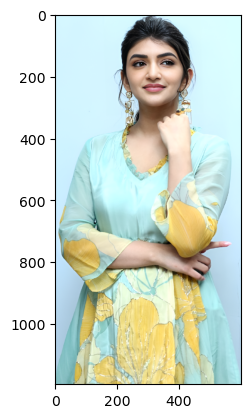

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Creating an image dataset using tensorflow

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/Users/kogatambharath/Desktop/data',batch_size=8)

Found 289 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
batch[0].shape

(8, 256, 256, 3)

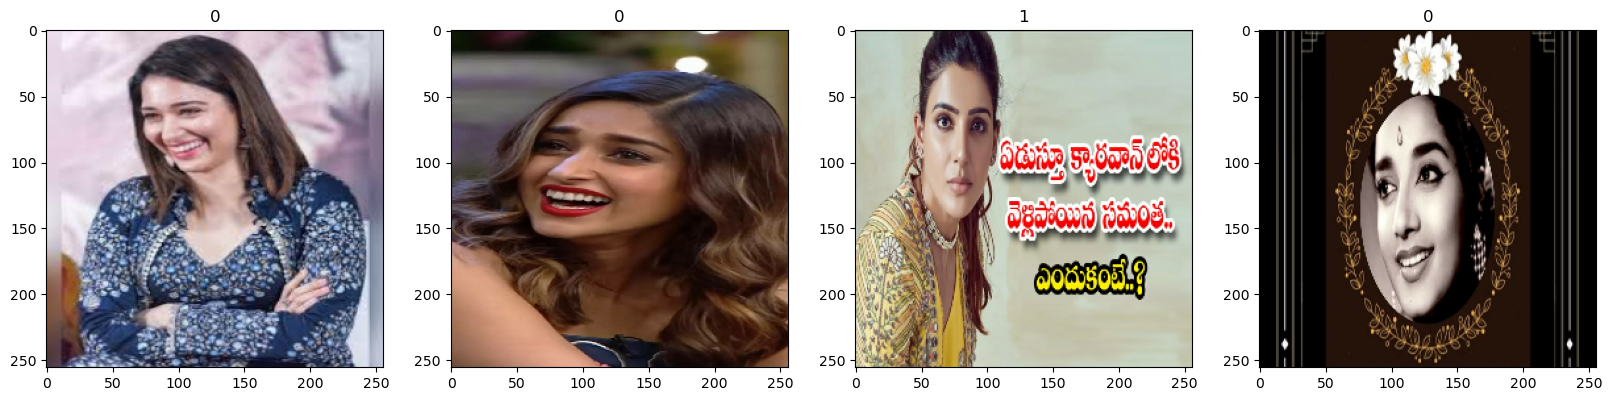

In [15]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

# Scale data

In [16]:
data = data.map(lambda x,y:(x/255,y))

In [17]:
scaled_iterator=data.as_numpy_iterator()

In [18]:
batch = scaled_iterator.next()

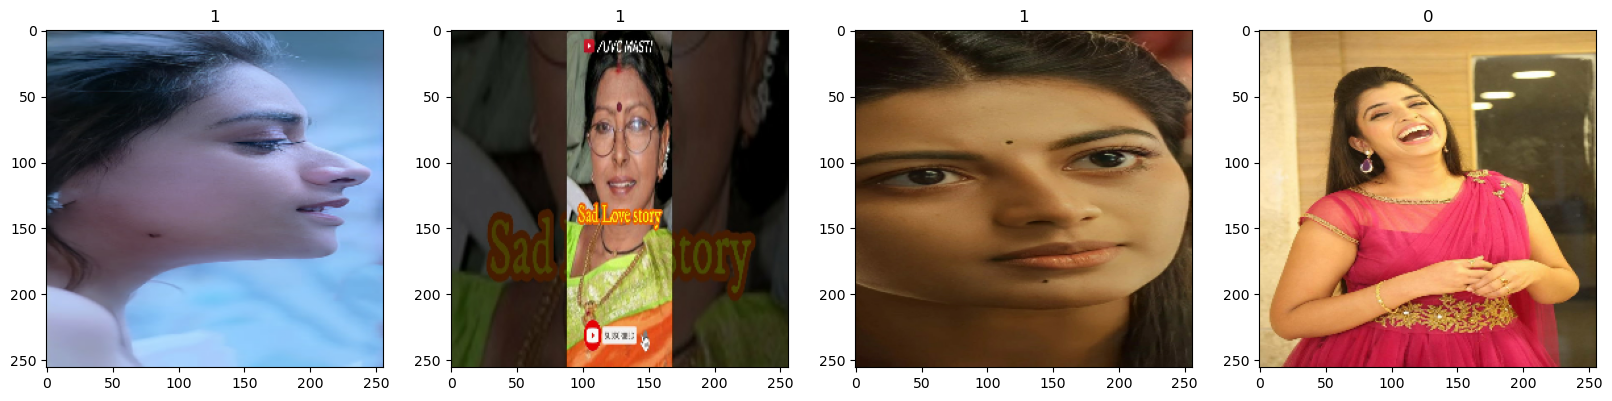

In [19]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

In [20]:
len(data)

37

# Splitting the data into train , test and validation data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [22]:
test_size+train_size+val_size

37

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
len(test)

4

# Creating a CNN network 

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [32]:
hist = model.fit(train, epochs=20, validation_data=val)


Epoch 1/20
25/25 [==============================] - 3s 99ms/step - loss: 0.8644 - accuracy: 0.4500 - val_loss: 0.6850 - val_accuracy: 0.5625
Epoch 2/20
25/25 [==============================] - 3s 97ms/step - loss: 0.6773 - accuracy: 0.5950 - val_loss: 0.6642 - val_accuracy: 0.6250
Epoch 3/20
25/25 [==============================] - 3s 97ms/step - loss: 0.6117 - accuracy: 0.6850 - val_loss: 0.6462 - val_accuracy: 0.5781
Epoch 4/20
25/25 [==============================] - 3s 99ms/step - loss: 0.5946 - accuracy: 0.6750 - val_loss: 0.6299 - val_accuracy: 0.5938
Epoch 5/20
25/25 [==============================] - 3s 96ms/step - loss: 0.5254 - accuracy: 0.7650 - val_loss: 0.6126 - val_accuracy: 0.7188
Epoch 6/20
25/25 [==============================] - 3s 97ms/step - loss: 0.4383 - accuracy: 0.8050 - val_loss: 0.5455 - val_accuracy: 0.7344
Epoch 7/20
25/25 [==============================] - 3s 97ms/step - loss: 0.2950 - accuracy: 0.8800 - val_loss: 0.5224 - val_accuracy: 0.7969
Epoch 8/20
25


# Evaluating the model

In [33]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    y_binary = y > 0.5  # Convert predictions to binary
    
    pre.update_state(y_binary, yhat)
    re.update_state(y_binary, yhat)
    acc.update_state(y_binary, yhat)


1/1 [==============================] - 0s 11ms/step


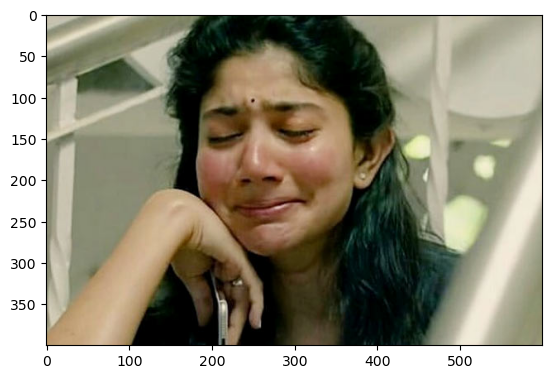

In [46]:
img= cv2.imread('/Users/kogatambharath/Desktop/cr.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# Resizing the image for prediction

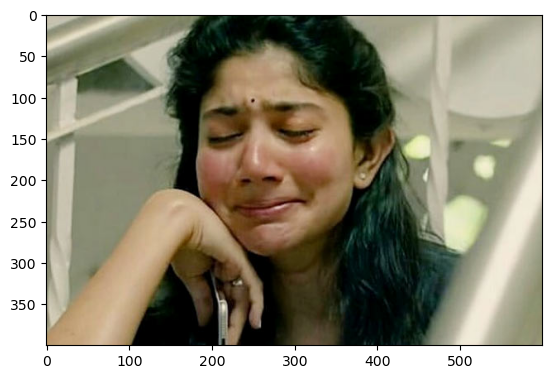

In [50]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 13ms/step


In [52]:

        if yhat > 0.5:
            print('Predicted class is Sad')
        else:
            print('Predicted class is Happy')


Predicted class is Sad
